In [1]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

air_quality_no2_long_csv = "/kaggle/input/220527-adpy-w13-files/air_quality_no2_long.csv"
titanic_csv = "/kaggle/input/220527-adpy-w13-files/titanic.csv"
air_quality_parameters_csv = "/kaggle/input/220527-adpy-w13-files/air_quality_parameters.csv"
air_quality_stations_csv = "/kaggle/input/220527-adpy-w13-files/air_quality_stations.csv"
air_quality_pm25_long_csv = "/kaggle/input/220527-adpy-w13-files/air_quality_pm25_long.csv"

/kaggle/input/220527-adpy-w13-files/air_quality_no2_long.csv
/kaggle/input/220527-adpy-w13-files/titanic.csv
/kaggle/input/220527-adpy-w13-files/air_quality_parameters.csv
/kaggle/input/220527-adpy-w13-files/air_quality_stations.csv
/kaggle/input/220527-adpy-w13-files/air_quality_pm25_long.csv


## 테이블 병합
---   
- 속성이 동일한 두 테이블 병합
- 속성이 상이한 두 테이블 병합

In [2]:
# 속성이 동일한 두 테이블 병합

import pandas as pd

air_quality_no2 = pd.read_csv(air_quality_no2_long_csv, parse_dates=True)
air_quality_no2 = air_quality_no2[["date.utc", "location", "parameter", "value"]]

air_quality_pm25 = pd.read_csv(air_quality_pm25_long_csv, parse_dates=True)
air_quality_pm25 = air_quality_pm25[["date.utc", "location", "parameter", "value"]]

air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0) 

print('Shape of the air_quality_pm25 table: ', air_quality_pm25.shape, end="\n\n")
print('Shape of the air_quality_no2 table: ', air_quality_no2.shape, end="\n\n")
print('Shape of the resulting table: ', air_quality.shape, end="\n\n")

air_quality = air_quality.sort_values("date.utc")
air_quality

Shape of the air_quality_pm25 table:  (1110, 4)

Shape of the air_quality_no2 table:  (2068, 4)

Shape of the resulting table:  (3178, 4)



,date.utc,location,parameter,value
2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0
1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0
100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5
1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5
1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0
...,...,...,...,...
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
102,2019-06-20 23:00:00+00:00,London Westminster,pm25,7.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
101,2019-06-21 00:00:00+00:00,London Westminster,pm25,7.0


In [3]:
# 속성이 상이한 두 테이블 병합

import pandas as pd

city = pd.DataFrame({'Num':[175, 178, 389, 927, 1064], 'City':['Seoul', 'Incheon', 'Daejeon', 'Gwangju', 'Busan']})
weather = pd.DataFrame({'Num':[178, 1064, 1095], 'Weather':['Sunny', 'Rain', 'Windy']})

In [4]:
# 두 테이블 중 왼쪽 기준으로 병합
# 왼쪽에는 있고 오른쪽 테이블에는 없는 값은 NaN
# 오른쪽에만 있는 값은 버려짐
pd.merge(city, weather, on='Num', how='left')

,Num,City,Weather
0,175,Seoul,NaN
1,178,Incheon,Sunny
2,389,Daejeon,NaN
3,927,Gwangju,NaN
4,1064,Busan,Rain


In [5]:
# 두 테이블 중 오른쪽 기준으로 병합
# 오른쪽에는 있고 왼쪽 테이블에는 없는 값은 NaN
# 왼쪽에만 있는 값은 버려짐
pd.merge(city, weather, on='Num', how='right')

,Num,City,Weather
0,178,Incheon,Sunny
1,1064,Busan,Rain
2,1095,NaN,Windy


In [6]:
# 양쪽 테이블 모두 기준으로 함
# 두 테이블에 모두 값이 있는 것만 남는다
pd.merge(city, weather, on='Num', how='inner')

,Num,City,Weather
0,178,Incheon,Sunny
1,1064,Busan,Rain


In [7]:
# 양쪽 테이블 모두 기준으로 함
# 둘 중 한 테이블이라도 값이 있으면 모두 합친다
pd.merge(city, weather, on='Num', how='outer')

,Num,City,Weather
0,175,Seoul,NaN
1,178,Incheon,Sunny
2,389,Daejeon,NaN
3,927,Gwangju,NaN
4,1064,Busan,Rain
5,1095,NaN,Windy


## 문자열 data 처리
---
- 문자열은 `.str` 접근자 통해서 처리 가능
- Element-wise 처리
- `replace()`: 값을 전환할 때 사용하는 메서드

In [8]:
import pandas as pd

titanic = pd.read_csv(titanic_csv)

print(titanic["Name"], end="\n\n")  # 이름 속성 프린트
print(titanic["Name"].str.lower(), end="\n\n")  # 이름 속성 전부 소문자로 바꿔서 프린트
print(titanic["Name"].str.split(","), end="\n\n")  # 이름 속성의 샘플 각각 쉼표 단위로 구분해서 리스트로 만듦

titanic["Surname"] = titanic["Name"].str.split(",").str.get(0)  # 이름 속성의 샘플 각각 쉼표 단위로 구분해서 리스트로 만들고, 그 중 첫 번째 요소만 저장

print(titanic["Surname"], end="\n\n")  # Surname 속성 프린트
print(titanic["Name"].str.contains("Countess"), end="\n\n")  # 이름 속성의 샘플이 "Countess"라는 값을 포함하는지에 대한 bool 출력
print(titanic["Name"].str.len(), end="\n\n")  # 이름 길이 출력
print(titanic["Name"].str.len().idxmax(), end="\n\n")  # 이름이 가장 긴 샘플의 인덱스 출력
print(titanic.loc[titanic["Name"].str.len().idxmax(), "Name"], end="\n\n")  # 이름이 가장 긴 샘플의 이름 출력

titanic["Sex_short"] = titanic["Sex"].replace({"male": "M", "female": "F"})  # 성별 속성의 값(key)을 지정한 딕셔너리의 value로 대체한 새 속성 추가
titanic  # titanic 보기

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Sex_short
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,F
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,F
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,F
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,F
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,M


## Time series
---
- `to_datetime()` : string을 날짜 object로 바꾸는 함수
- `dt` : date-related properties
- DatetimeIndex : `no_2["2019-05-20":"2019-05-21"]`

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

air_quality = pd.read_csv(air_quality_no2_long_csv)
air_quality = air_quality.rename(columns={"date.utc": "datetime"})  # 지정한 속성의 이름 변경
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])  # to_datetime : string을 날짜 object로 바꾸는 함수

print(air_quality["datetime"], end="\n\n")  # 날짜 오브젝트로 바꾼 날짜 속성 출력
print(air_quality["datetime"].min(), end="\n\n")  # 날짜 오브젝트 속성 중 최솟값 출력
print(air_quality["datetime"].max(), end="\n\n")  # 날짜 오브젝트 속성 중 최댓값 출력
print(air_quality["datetime"].max() - air_quality["datetime"].min(), end="\n\n")  # 최댓값 - 최솟값 출력

air_quality["month"] = air_quality["datetime"].dt.month
air_quality["weekday"] = air_quality["datetime"].dt.weekday

air_quality

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

2019-05-07 01:00:00+00:00

2019-06-21 00:00:00+00:00

44 days 23:00:00



,city,country,datetime,location,parameter,value,unit,month,weekday
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6,4
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6,3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6,3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6,3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6,3
...,...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,5,1
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,5,1
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,5,1
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,5,1


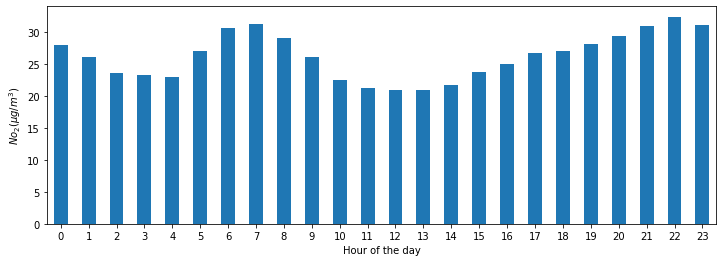

In [10]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Hour of the day")
plt.ylabel("$No_2(\mu g/m^3)$")
plt.show()

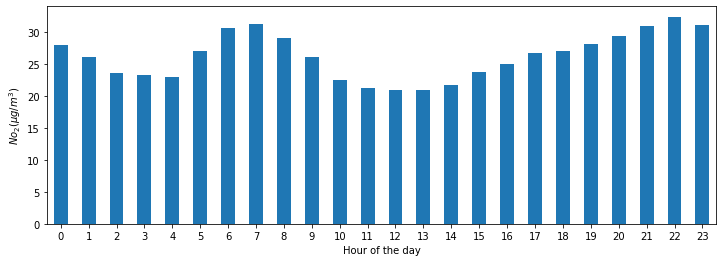

In [11]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Hour of the day")
plt.ylabel("$No_2(\mu g/m^3)$")
plt.show()

location                   BETR801  FR04014  London Westminster
datetime                                                       
2019-05-07 01:00:00+00:00     50.5     25.0                23.0
2019-05-07 02:00:00+00:00     45.0     27.7                19.0
2019-05-07 03:00:00+00:00      NaN     50.4                19.0
2019-05-07 04:00:00+00:00      NaN     61.9                16.0
2019-05-07 05:00:00+00:00      NaN     72.4                 NaN

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='datetime', length=1033)

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
           dtype='int64', name='datetime', length=1033)



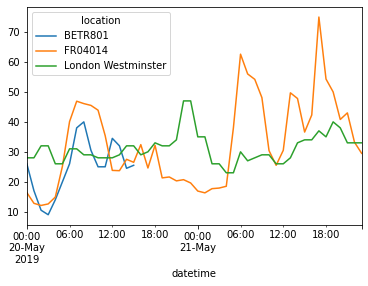

In [12]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
print(no_2.head(), end="\n\n")
print(no_2.index.year, end="\n\n")
print(no_2.index.weekday, end="\n\n")
no_2["2019-05-20":"2019-05-21"].plot()  # DatetimeIndex
plt.show()

### 출석 대체 예제
---

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]
2019-05-07 01:00:00+00:00
2019-06-21 00:00:00+00:00
44 days 23:00:00


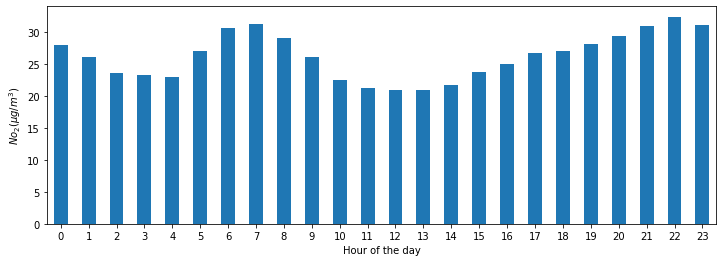

location                   BETR801  FR04014  London Westminster
datetime                                                       
2019-05-07 01:00:00+00:00     50.5     25.0                23.0
2019-05-07 02:00:00+00:00     45.0     27.7                19.0
2019-05-07 03:00:00+00:00      NaN     50.4                19.0
2019-05-07 04:00:00+00:00      NaN     61.9                16.0
2019-05-07 05:00:00+00:00      NaN     72.4                 NaN
Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='datetime', length=1033)
Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
           dtype='int64', name='datetime', length=1033)


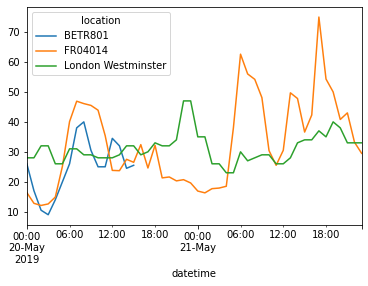

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

air_quality = pd.read_csv(air_quality_no2_long_csv)
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
print(air_quality["datetime"])
print(air_quality["datetime"].min())
print(air_quality["datetime"].max())
print(air_quality["datetime"].max()-air_quality["datetime"].min())
air_quality["month"] = air_quality["datetime"].dt.month
air_quality["weekday"] = air_quality["datetime"].dt.weekday

fig,axs = plt.subplots(figsize=(12,4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Hour of the day")
plt.ylabel("$No_2(\mu g/m^3)$")
plt.show()

no_2 = air_quality.pivot(index="datetime", columns="location", 
values="value")
print(no_2.head())
print(no_2.index.year);print(no_2.index.weekday)
no_2["2019-05-20":"2019-05-21"].plot()
plt.show()

## Missing data processing
---
- `isna()` : NaN이면 True
- `notna()` : NaN이면 False

In [14]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5, 3),
                  index=["a", "c", "e", "f", "h"],
                  columns=["one", "two", "three"],
                 )

df["four"] = "bar"  # 새 속성의 모든 값이 "bar"가 됨
df["five"] = df["one"] > 0  # 새 속성에 식의 결과값이 각각 저장됨

df

,one,two,three,four,five
a,1.138941,0.366537,-2.063567,bar,True
c,0.720475,-1.365804,0.367113,bar,True
e,-1.056324,0.104030,1.361490,bar,False
f,-0.515411,0.470009,-1.046039,bar,False
h,1.256227,1.902384,0.598284,bar,True


In [15]:
df2 = df.reindex(["a", "b", "c", "d", "e", "f", "g", "h"])  # 위에서 사용한 데이터프레임의 인덱스(행 번호) 이름을 다시 지정함
# 원래는 없던 인덱스가 있다면 NaN으로 채워짐

df2["one"]

a    1.138941
b         NaN
c    0.720475
d         NaN
e   -1.056324
f   -0.515411
g         NaN
h    1.256227
Name: one, dtype: float64

In [16]:
pd.isna(df2["one"])  # NaN이면 True

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [17]:
df2["four"].notna()  # NaN이면 False

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: four, dtype: bool

In [18]:
df2.isna()  # NaN이면 True

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


### Missing data가 있을 때의 연산   
- NaN + 값 = NaN
- `sum()`, `mean()` 등 함수에 의한 계산은 NaN 값을 자동으로 무시함
- `cumsum()` : 누적합
    - `skipna=False` : NaN 포함해서 계산함

In [19]:
a = pd.DataFrame([[np.nan, -0.282863],
                  [np.nan, 1.212112],
                  [-.199209,-1.044236],
                  [-2.104569, -0.494929],
                  [-2.104569, -0.706771]],
                 index=["a", "c", "e", "f", "h"],
                 columns=["one", "two"],
                )

b = pd.DataFrame([[np.nan, -0.282863, -1.509059],
                  [np.nan, 1.212112, -0.173215],
                  [-.199209, -1.044236, -0.861849],
                  [np.nan, - 0.494929, 1.071804],
                  [-2.1057, -0.706771,-1.039575]],
                 index=["a", "c", "e", "f", "h"],
                 columns=["one", "two", "three"],
                )

a + b

,one,three,two
a,NaN,NaN,-0.565726
c,NaN,NaN,2.424224
e,-0.398418,NaN,-2.088472
f,NaN,NaN,-0.989858
h,-4.210269,NaN,-1.413542


In [20]:
b["one"].sum()

-2.3049090000000003

In [21]:
b.mean(1)  # 0은 열(속성) 단위 계산, 1은 인덱스 단위 계산

a   -0.895961
c    0.519448
e   -0.701765
f    0.288438
h   -1.284015
dtype: float64

In [22]:
b.cumsum()  # 누적합

,one,two,three
a,NaN,-0.282863,-1.509059
c,NaN,0.929249,-1.682274
e,-0.199209,-0.114987,-2.544123
f,NaN,-0.609916,-1.472319
h,-2.304909,-1.316687,-2.511894


In [23]:
b.cumsum(skipna=False)

,one,two,three
a,NaN,-0.282863,-1.509059
c,NaN,0.929249,-1.682274
e,NaN,-0.114987,-2.544123
f,NaN,-0.609916,-1.472319
h,NaN,-1.316687,-2.511894


- 비어있거나 모두 NaN인 Series의 합은 0, 곱은 1
- `GroupBy()` : NaN은 자동 제외

In [24]:
print(pd.Series([np.nan]).sum(), end="\n\n")
print(pd.Series([], dtype="float64").sum(), end="\n\n")
print(pd.Series([np.nan]).prod(), end="\n\n")  # 곱
print(pd.Series([], dtype="float64").prod(), end="\n\n")  # 곱

b = pd.DataFrame([[np.nan, -0.282863],
                  [np.nan, 1.212112],
                  [-.199209,-1.044236],
                  [np.nan, -0.494929],],
                 index=["a", "c", "e", "f"],
                 columns=["one", "two"],
                 )

b.groupby("one").mean()

0.0

0.0

1.0

1.0



,two
one,
-0.199209,-1.044236


### 손실 데이터 채우기
- `fillna()` : NaN을 지정한 값으로 채움

In [25]:
b = pd.DataFrame([[np.nan, -0.282863],
                  [np.nan, 1.212112],
                  [-.199209,-1.044236],
                  [np.nan, -0.494929],],
                 index=["a", "c", "e", "f"],
                 columns=["one", "two"],
                )

b1 = b
b2 = b

print(b.fillna(0), end="\n\n")
print(b1.fillna("no data"), end="\n\n")
print(b2.fillna(method="pad"), end="\n\n")

        one       two
a  0.000000 -0.282863
c  0.000000  1.212112
e -0.199209 -1.044236
f  0.000000 -0.494929

        one       two
a   no data -0.282863
c   no data  1.212112
e -0.199209 -1.044236
f   no data -0.494929

        one       two
a       NaN -0.282863
c       NaN  1.212112
e -0.199209 -1.044236
f -0.199209 -0.494929



- `mean()` : Column의 평균으로 채움

In [26]:
import pandas as pd
import numpy as np

dff = pd.DataFrame(np.random.randn(10, 3), columns=list("ABC"))

dff.iloc[3:5, 0] = np.nan
dff.iloc[4:6, 1] = np.nan
dff.iloc[5:8, 2] = np.nan

dff

,A,B,C
0,-0.438327,-0.047815,0.064130
1,-0.797710,-0.939351,0.275244
2,-0.470478,-0.668732,-0.665118
3,NaN,0.566876,-1.340106
4,NaN,NaN,-0.607494
5,0.317693,NaN,NaN
6,0.678947,0.571302,NaN
7,0.059711,0.164630,NaN
8,1.498166,0.632405,-0.092434
9,-0.585100,-0.755124,-1.228983


In [27]:
dff.fillna(dff.mean())

,A,B,C
0,-0.438327,-0.047815,0.064130
1,-0.797710,-0.939351,0.275244
2,-0.470478,-0.668732,-0.665118
3,0.032863,0.566876,-1.340106
4,0.032863,-0.059476,-0.607494
5,0.317693,-0.059476,-0.513537
6,0.678947,0.571302,-0.513537
7,0.059711,0.164630,-0.513537
8,1.498166,0.632405,-0.092434
9,-0.585100,-0.755124,-1.228983


- Interpolation
    - `interpolate()` : 대충 추세에 맞게(추세선 따라) 자연스러워보이게 채워줌

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ts = pd.Series(np.arange(100) + np.random.random(100), name="data")
ts

0      0.248540
1      1.443072
2      2.362076
3      3.676805
4      4.591448
        ...    
95    95.339949
96    96.179210
97    97.767744
98    98.597869
99    99.672657
Name: data, Length: 100, dtype: float64

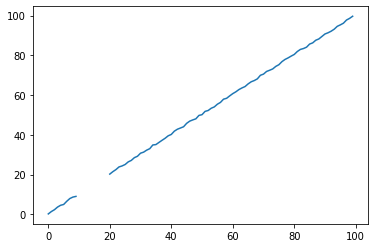

In [29]:
ts.iloc[10:20] = np.nan
ts.plot()
plt.show()

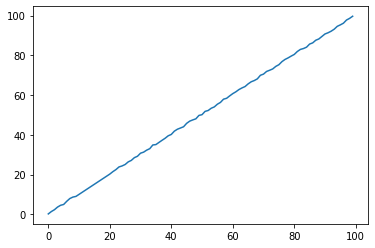

In [30]:
ts1 = ts.interpolate()
ts1.plot()
plt.show()

## 기타 데이터 프로세싱
---
### 중복 제거
- `duplicated()` : 중복 여부를 boolean으로 리턴
- `drop_duplicates()` : 중복 data 삭제

In [31]:
import pandas as pd

df = pd.DataFrame({'c1':['a','b','c'] * 2 + ['b'] + ['c'],
                   'c2':[1, 2, 1, 1, 2, 3, 3, 4]})

df

,c1,c2
0,a,1
1,b,2
2,c,1
3,a,1
4,b,2
5,c,3
6,b,3
7,c,4


In [32]:
df.duplicated()  # 중복 여부를 boolean으로 리턴

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool

In [33]:
df.drop_duplicates()  # 중복 data 삭제

,c1,c2
0,a,1
1,b,2
2,c,1
5,c,3
6,b,3
7,c,4


### 값 치환
- `replace()` : 특정 data의 값을 대체함

In [34]:
import pandas as pd
import numpy as np

s = pd.Series([1, 2, -999, 4, 5, 1000])

s

0       1
1       2
2    -999
3       4
4       5
5    1000
dtype: int64

In [35]:
s.replace(-999, np.nan)

0       1.0
1       2.0
2       NaN
3       4.0
4       5.0
5    1000.0
dtype: float64

In [36]:
s.replace([-999, 1000], np.nan)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
5    NaN
dtype: float64

In [37]:
s.replace([-999, 1000], [np.nan, 0])

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
5    0.0
dtype: float64

## Multi indexing
---
- 고차원의 데이터 처리
- **단일 인덱스 내에서 여러 인덱스 포함하는 다중 인덱싱**
- Multi indexing 내 slicing
- `unstack()` : 다중 인덱싱 해제 -> 두 인덱스가 행과 열 속성으로 분리됨
- `stack()` : 다중 인덱싱 생성 -> 행과 열 속성으로 분리되어 있던 인덱스가 모두 행 속성으로 합쳐짐. 원래 행 속성이었던 인덱스가 큰 인덱스가 되고 열 속성이었던 인덱스가 작은 인덱스가 됨

In [38]:
import pandas as pd

idx_tuples = [('Seoul', 2010), ('Seoul', 2020), ('Busan', 2010), ('Busan', 2020), ('Incheon', 2010),('Incheon',2020)]
idx_tuples

[('Seoul', 2010),
 ('Seoul', 2020),
 ('Busan', 2010),
 ('Busan', 2020),
 ('Incheon', 2010),
 ('Incheon', 2020)]

In [39]:
pop_tuples = [10312314, 9710381, 2596820, 3410920, 2748192, 2918031]
population = pd.Series(pop_tuples, index=idx_tuples)
population

(Seoul, 2010)      10312314
(Seoul, 2020)       9710381
(Busan, 2010)       2596820
(Busan, 2020)       3410920
(Incheon, 2010)     2748192
(Incheon, 2020)     2918031
dtype: int64

In [40]:
midx = pd.MultiIndex.from_tuples(idx_tuples)
population = population.reindex(midx)
population

Seoul    2010    10312314
         2020     9710381
Busan    2010     2596820
         2020     3410920
Incheon  2010     2748192
         2020     2918031
dtype: int64

In [41]:
population[:,2010]

Seoul      10312314
Busan       2596820
Incheon     2748192
dtype: int64

In [42]:
population['Seoul',:]

2010    10312314
2020     9710381
dtype: int64

In [43]:
population_mod = population.unstack()
population_mod

,2010,2020
Busan,2596820,3410920
Incheon,2748192,2918031
Seoul,10312314,9710381


In [44]:
population_mod.stack()

Busan    2010     2596820
         2020     3410920
Incheon  2010     2748192
         2020     2918031
Seoul    2010    10312314
         2020     9710381
dtype: int64